# ISYE6501x Homework 7

Done By: Joel Quek

## Question 10.1

Using the same crime data set uscrime.txt as in Questions 8.2 and 9.1, find the best model you can using

(a) a regression tree model, and 

(b) a random forest model.

In R, you can use the tree package or the rpart package, and the randomForest package. For each model,describe one or two qualitative takeaways you get from analyzing the results (i.e., don’t just stop when you have a good model, but interpret it too).

---

## Dataset and Libraries

In [1]:
library(rpart)
library(rpart.plot)
library(tree)
library(RColorBrewer)
library(rattle)
library(caret)
library(randomForest)
library(data.table)
library(mltools)
library(ggplot2)
library(cowplot)

Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.

Loading required package: ggplot2

Loading required package: lattice

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:rattle':

    importance




In [2]:
crime <- read.table("uscrime.txt", header=TRUE)

In [3]:
head(crime)

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
2,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
3,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
4,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
5,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
6,12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


In [4]:
summary(crime)

       M               So               Ed             Po1       
 Min.   :11.90   Min.   :0.0000   Min.   : 8.70   Min.   : 4.50  
 1st Qu.:13.00   1st Qu.:0.0000   1st Qu.: 9.75   1st Qu.: 6.25  
 Median :13.60   Median :0.0000   Median :10.80   Median : 7.80  
 Mean   :13.86   Mean   :0.3404   Mean   :10.56   Mean   : 8.50  
 3rd Qu.:14.60   3rd Qu.:1.0000   3rd Qu.:11.45   3rd Qu.:10.45  
 Max.   :17.70   Max.   :1.0000   Max.   :12.20   Max.   :16.60  
      Po2               LF              M.F              Pop        
 Min.   : 4.100   Min.   :0.4800   Min.   : 93.40   Min.   :  3.00  
 1st Qu.: 5.850   1st Qu.:0.5305   1st Qu.: 96.45   1st Qu.: 10.00  
 Median : 7.300   Median :0.5600   Median : 97.70   Median : 25.00  
 Mean   : 8.023   Mean   :0.5612   Mean   : 98.30   Mean   : 36.62  
 3rd Qu.: 9.700   3rd Qu.:0.5930   3rd Qu.: 99.20   3rd Qu.: 41.50  
 Max.   :15.700   Max.   :0.6410   Max.   :107.10   Max.   :168.00  
       NW              U1                U2            

## Regression Tree

Source: https://www.pluralsight.com/guides/explore-r-libraries:-rpart

In [5]:
set.seed(1)

tree_model<- rpart(Crime~ ., data = crime,method="anova" )

summary(tree_model)

Call:
rpart(formula = Crime ~ ., data = crime, method = "anova")
  n= 47 

          CP nsplit rel error    xerror      xstd
1 0.36296293      0 1.0000000 1.0303899 0.2549076
2 0.14814320      1 0.6370371 0.8900680 0.2149365
3 0.05173165      2 0.4888939 0.9096979 0.2393384
4 0.01000000      3 0.4371622 0.8893049 0.2346618

Variable importance
   Po1    Po2 Wealth   Ineq   Prob      M     NW    Pop   Time     Ed     LF 
    17     17     11     11     10     10      9      5      4      4      1 
    So 
     1 

Node number 1: 47 observations,    complexity param=0.3629629
  mean=905.0851, MSE=146402.7 
  left son=2 (23 obs) right son=3 (24 obs)
  Primary splits:
      Po1    < 7.65      to the left,  improve=0.3629629, (0 missing)
      Po2    < 7.2       to the left,  improve=0.3629629, (0 missing)
      Prob   < 0.0418485 to the right, improve=0.3217700, (0 missing)
      NW     < 7.65      to the left,  improve=0.2356621, (0 missing)
      Wealth < 6240      to the left,  improve=

### Regression Tree Plot

Source: https://discuss.analyticsvidhya.com/t/what-are-the-packages-required-to-plot-a-fancy-rpart-plot-in-r/6776/2

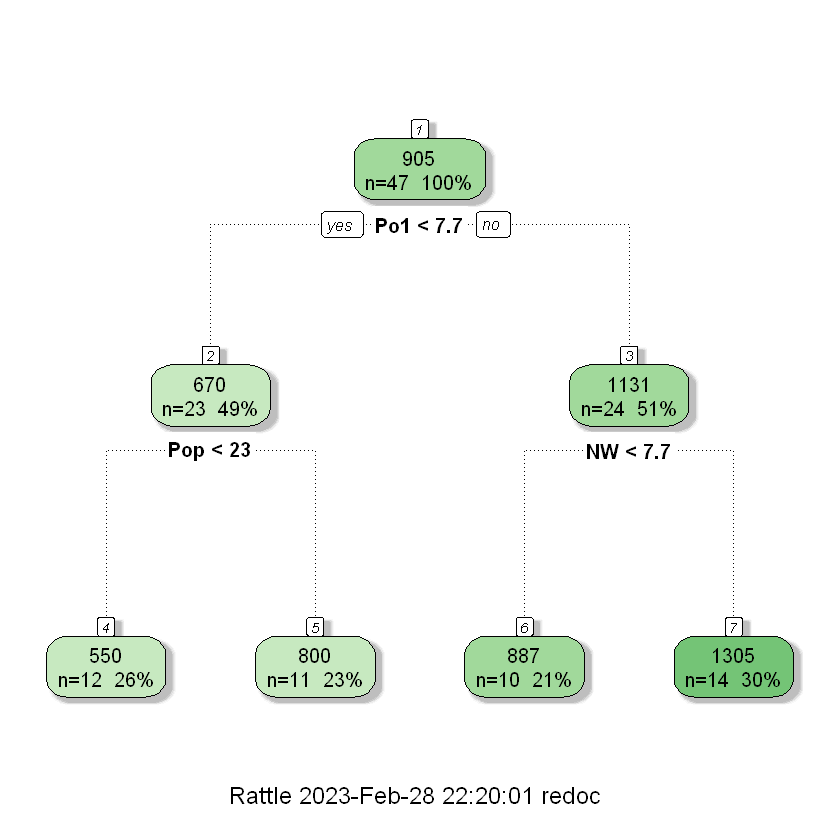

In [6]:
fancyRpartPlot(tree_model)
# rpart.plot(tree_model) also works

From the Regression Tree only three variables are used 
1. Po1
2. Pop
3. NW

### Variable Importance

In [7]:
tree_model$variable.importance

Po1       Po2    Wealth      Ineq      Prob         M        NW       Pop 
2497521.7 2497521.7 1628818.5 1602212.0 1520230.6 1388627.8 1245883.8  661770.6 
     Time        Ed        LF        So 
 601906.0  569545.9  203872.5  161800.8

Variable importance is determined by calculating the relative influence of each variable: whether that variable was selected to split on during the tree building process, and how much the squared error (over all trees) improved (decreased) as a result.

Source: https://h2o-release.s3.amazonaws.com/h2o/rel-yau/3/docs-website/h2o-docs/variable-importance.html#:~:text=Variable%20importance%20is%20determined%20by,(decreased)%20as%20a%20result.

### Model Evaluation

Source (Regression): https://medium.com/nerd-for-tech/implementing-decision-trees-in-r-regression-problem-using-rpart-c74cbd9e0b7b

Source (Classification): https://www.pluralsight.com/guides/explore-r-libraries:-rpart

In [8]:
set.seed(100)
trainRowNumbers <- createDataPartition(crime$Crime, p=0.7, list=FALSE)
train <- crime[trainRowNumbers,]
test <- crime[-trainRowNumbers,]
dim(train); dim(test) 

[1] 35 16

[1] 12 16

In [9]:
PredictCART_train = predict(tree_model, data = test, type="vector")

In [10]:
MAE <- function(actual,pred) {mean(abs(actual-pred))}

MAE(test$Crime,PredictCART_train)

Warning message in actual - pred:
"longer object length is not a multiple of shorter object length"


[1] 356.9868

In [11]:
y1 <- predict(tree_model, test)
MSE1 <- mean((y1-test$Crime)^2)
MSE1

[1] 65045.37

### Regression Tree Complexity Parameter


Regression tree:
rpart(formula = Crime ~ ., data = crime, method = "anova")

Variables actually used in tree construction:
[1] NW  Po1 Pop

Root node error: 6880928/47 = 146403

n= 47 

        CP nsplit rel error  xerror    xstd
1 0.362963      0   1.00000 1.03039 0.25491
2 0.148143      1   0.63704 0.89007 0.21494
3 0.051732      2   0.48889 0.90970 0.23934
4 0.010000      3   0.43716 0.88930 0.23466


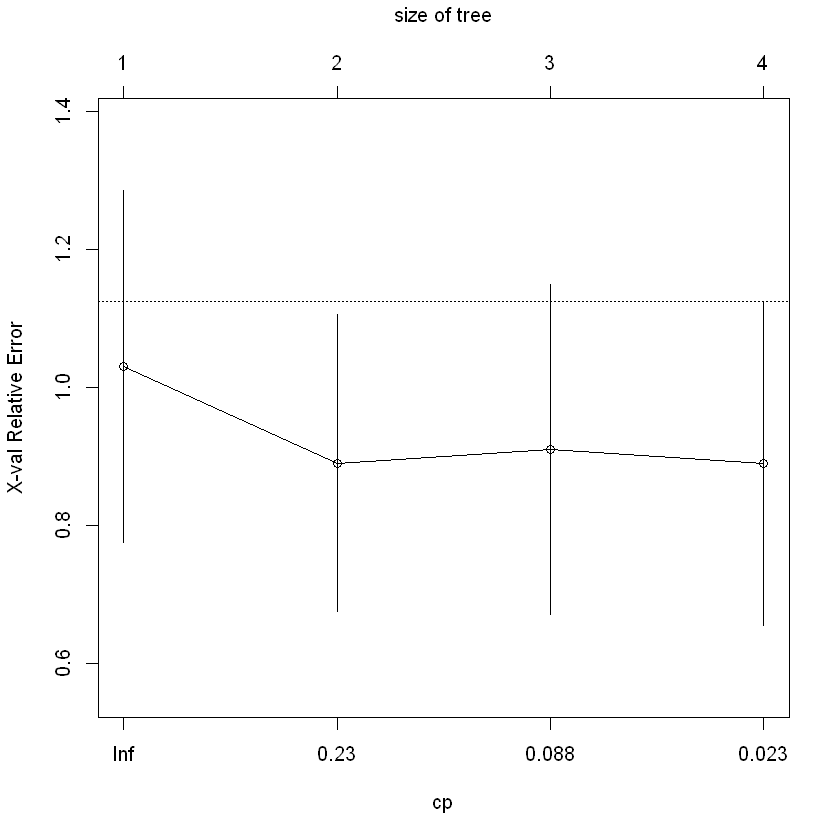

In [12]:
printcp(tree_model)

plotcp(tree_model)

### Pruning the Tree

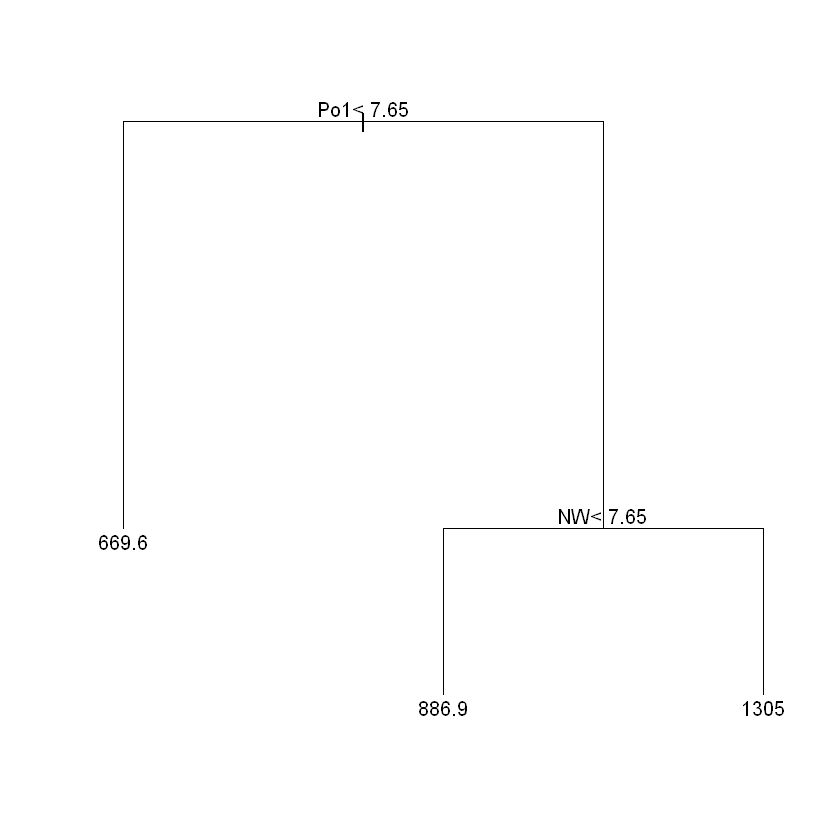

In [13]:
pruned_model <- prune.rpart(tree_model,cp=0.10) # adjust the cp parameter to get different models

plot(pruned_model)

text(pruned_model)

#fancyRpartPlot(tree_model)

### Test the Pruned Model

In [14]:
y2 <- predict(pruned_model, test)

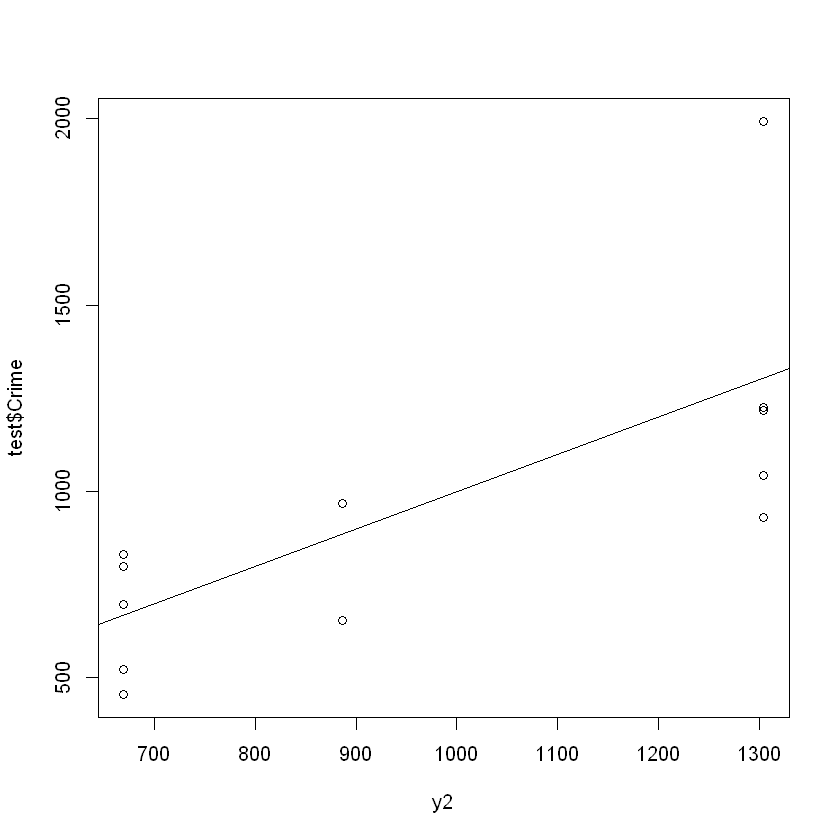

In [15]:
plot(y2, test$Crime)

abline(0,1)

In [16]:
MSE2 <- mean((y2-test$Crime)^2)
MSE2

[1] 72477.79

The MSE is worse for the pruned tree

### Regression Equations at the Leaves

In [17]:
pruned_model$where

[1] 2 5 2 5 4 4 5 5 2 2 5 2 2 2 2 5 2 5 4 5 2 2 5 4 2 5 2 5 5 2 2 5 2 4 4 4 2 2
[39] 2 5 2 2 2 4 2 4 4

In [18]:
leaf4 <-crime[which(pruned_model$where==4),]

leaf5 <-crime[which(pruned_model$where==5),]

leaf2 <-crime[which(pruned_model$where==2),]

#leaf6 <-crime[which(pruned_model$where==6),]

In [19]:
model_leaf4<-lm(Crime~., data=leaf4)
model_leaf4
#summary(leaf4)


Call:
lm(formula = Crime ~ ., data = leaf4)

Coefficients:
(Intercept)            M           So           Ed          Po1          Po2  
   32527.85       258.27           NA       -46.38     -1168.92       612.42  
         LF          M.F          Pop           NW           U1           U2  
   16612.42      -384.45       -18.22       124.13      2064.68           NA  
     Wealth         Ineq         Prob         Time  
         NA           NA           NA           NA  


In [20]:
model_leaf5<-lm(Crime~., data=leaf5)
model_leaf5
#summary(leaf7)


Call:
lm(formula = Crime ~ ., data = leaf5)

Coefficients:
(Intercept)            M           So           Ed          Po1          Po2  
 -1.381e+04    8.012e+01   -2.827e+02    2.663e+02   -2.943e+02    3.571e+02  
         LF          M.F          Pop           NW           U1           U2  
 -1.648e+03    8.738e+01    1.154e+00    8.841e+00   -3.265e+04    5.783e+02  
     Wealth         Ineq         Prob         Time  
  2.416e-01    1.367e+02           NA           NA  


In [21]:
model_leaf2<-lm(Crime~., data=leaf2)
model_leaf2
#summary(leaf6)


Call:
lm(formula = Crime ~ ., data = leaf2)

Coefficients:
(Intercept)            M           So           Ed          Po1          Po2  
   -48.5477      45.8622     380.4815     187.9074      -3.5138      44.6382  
         LF          M.F          Pop           NW           U1           U2  
  1059.3652     -22.5521      10.6413       0.1010    4878.2802      -5.5126  
     Wealth         Ineq         Prob         Time  
    -0.1022       4.7779   -7317.4407     -20.0603  


### Observations

It appears that the R library produced the model with the lowest MSE.

---

## Random Forest Model

Source (Stat Quest): https://www.youtube.com/watch?v=6EXPYzbfLCE

In [22]:
set.seed(1)
forest_model <- randomForest(Crime ~. , data=crime,keep.forest=T, importance=TRUE,class=)
print(forest_model ) 


Call:
 randomForest(formula = Crime ~ ., data = crime, keep.forest = T,      importance = TRUE, class = ) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 87407.26
                    % Var explained: 40.3


### Variable Importance

In [23]:
importance(forest_model )

,%IncMSE,IncNodePurity
M,2.3965203,228719.50
So,2.6589225,23456.11
Ed,3.7141435,213283.48
Po1,12.4862109,1095484.85
Po2,11.0894307,1197840.76
LF,3.1325318,270248.43
M.F,1.7951798,232785.09
Pop,0.7784942,343523.34
NW,9.5782376,520590.05
U1,-1.9438082,133339.11


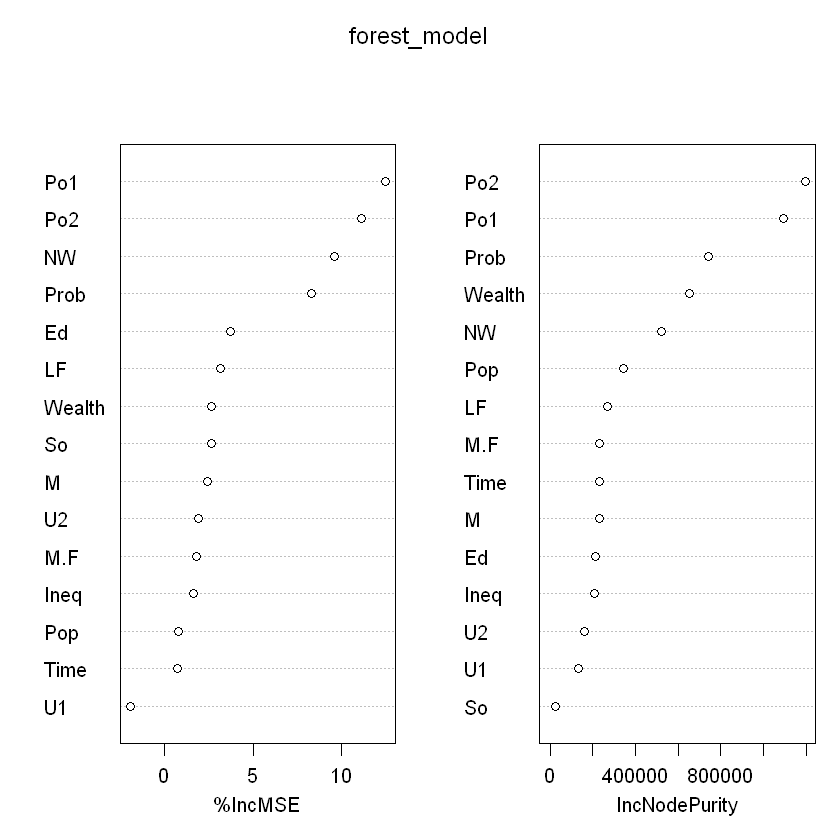

In [24]:
varImpPlot(forest_model )

### Performance of Random Forest Model

In [25]:
forest_predict <- predict(forest_model)
RSS <- sum((forest_predict-crime$Crime)^2)
# the residual sum of squares
TSS <- sum((mean(crime$Crime)-crime$Crime)^2)
#the total sum of squares
R_squared_forest<-1-(RSS/TSS) 
R_squared_forest

[1] 0.4029669

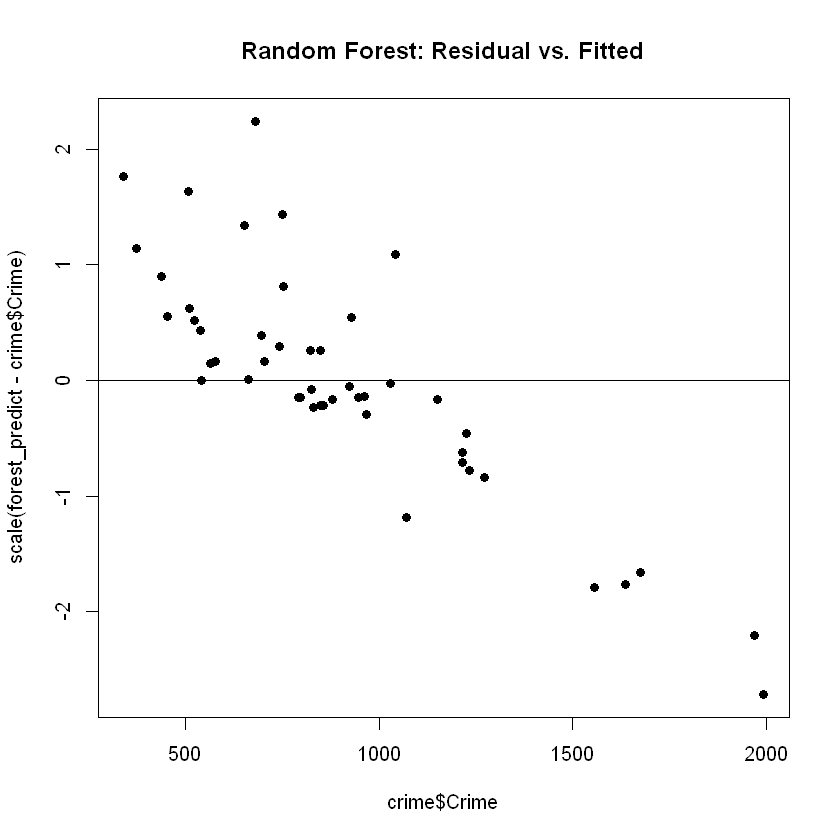

In [26]:
#residual analysis
plot(crime$Crime, scale(forest_predict-crime$Crime), pch =19,main="Random Forest: Residual vs. Fitted")
abline(0,0)

### Observations

$R^2$ is 0.402966921582338 which is a good score

---

## Question 10.2

Describe a situation or problem from your job, everyday life, current events, etc., for which a logistic regression model would be appropriate. List some (up to 5) predictors that you might use.


As an educator, there are times when I need to decide if a student is suitable for an Arts or Science program. Although there are tests with numeric scores used to mesaure, there are other intangible factors that should also be taken into account for instance:

1. Socio-economic factors
2. Gender
3. Race
4. Next-of-kin aptitude in the subjects

Such factors are categorical and would require logistic regression to model the response.

---

## Question 10.3

1.	Using the GermanCredit data set germancredit.txt from http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german / (description at http://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29 ), use logistic regression to find a good predictive model for whether credit applicants are good credit risks or not.  Show your model (factors used and their coefficients), the software output, and the quality of fit.  You can use the glm function in R. To get a logistic regression (logit) model on data where the response is either zero or one, use family=binomial(link=”logit”) in your glm function call.

2.	Because the model gives a result between 0 and 1, it requires setting a threshold probability to separate between “good” and “bad” answers.  In this data set, they estimate that incorrectly identifying a bad customer as good, is 5 times worse than incorrectly classifying a good customer as bad.  Determine a good threshold probability based on your model.


Source (Stat Quest): https://www.youtube.com/watch?v=C4N3_XJJ-jU

In [27]:
credit <- read.table("germancredit.txt",sep = " ")

In [28]:
head(credit,5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<int>
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,⋯,A121,67,A143,A152,2,A173,1,A192,A201,1
2,A12,48,A32,A43,5951,A61,A73,2,A92,A101,⋯,A121,22,A143,A152,1,A173,1,A191,A201,2
3,A14,12,A34,A46,2096,A61,A74,2,A93,A101,⋯,A121,49,A143,A152,1,A172,2,A191,A201,1
4,A11,42,A32,A42,7882,A61,A74,2,A93,A103,⋯,A122,45,A143,A153,1,A173,2,A191,A201,1
5,A11,24,A33,A40,4870,A61,A73,3,A93,A101,⋯,A124,53,A143,A153,2,A173,2,A191,A201,2


#### One-Hot Encode the Response Variable

In [33]:
set.seed(1)
credit_onehot <- one_hot(as.data.table(credit))
#one hot encoding the categorical variables

In [34]:
head(credit_onehot)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<int>
A11,6,A34,A43,1169,A65,A75,4,A93,A101,⋯,A121,67,A143,A152,2,A173,1,A192,A201,1
A12,48,A32,A43,5951,A61,A73,2,A92,A101,⋯,A121,22,A143,A152,1,A173,1,A191,A201,2
A14,12,A34,A46,2096,A61,A74,2,A93,A101,⋯,A121,49,A143,A152,1,A172,2,A191,A201,1
A11,42,A32,A42,7882,A61,A74,2,A93,A103,⋯,A122,45,A143,A153,1,A173,2,A191,A201,1
A11,24,A33,A40,4870,A61,A73,3,A93,A101,⋯,A124,53,A143,A153,2,A173,2,A191,A201,2
A14,36,A32,A46,9055,A65,A73,2,A93,A101,⋯,A124,35,A143,A153,1,A172,2,A192,A201,1


In [35]:
credit_onehot$V21[credit_onehot$V21==1]<-0
credit_onehot$V21[credit_onehot$V21==2]<-1

In the data dictionary [http://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29] 

1 = Good, 2 = Bad

Our one-hot encoding makes 

0 = Good and 1 = Bad

In [36]:
head(credit_onehot)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>
A11,6,A34,A43,1169,A65,A75,4,A93,A101,⋯,A121,67,A143,A152,2,A173,1,A192,A201,0
A12,48,A32,A43,5951,A61,A73,2,A92,A101,⋯,A121,22,A143,A152,1,A173,1,A191,A201,1
A14,12,A34,A46,2096,A61,A74,2,A93,A101,⋯,A121,49,A143,A152,1,A172,2,A191,A201,0
A11,42,A32,A42,7882,A61,A74,2,A93,A103,⋯,A122,45,A143,A153,1,A173,2,A191,A201,0
A11,24,A33,A40,4870,A61,A73,3,A93,A101,⋯,A124,53,A143,A153,2,A173,2,A191,A201,1
A14,36,A32,A46,9055,A65,A73,2,A93,A101,⋯,A124,35,A143,A153,1,A172,2,A192,A201,0


In [37]:
logistic <- glm(V21~.,data=credit_onehot, family="binomial")

In [39]:
summary(logistic) # pay attention to the coefficients


Call:
glm(formula = V21 ~ ., family = "binomial", data = credit_onehot)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3410  -0.6994  -0.3752   0.7095   2.6116  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.005e-01  1.084e+00   0.369 0.711869    
V1A12       -3.749e-01  2.179e-01  -1.720 0.085400 .  
V1A13       -9.657e-01  3.692e-01  -2.616 0.008905 ** 
V1A14       -1.712e+00  2.322e-01  -7.373 1.66e-13 ***
V2           2.786e-02  9.296e-03   2.997 0.002724 ** 
V3A31        1.434e-01  5.489e-01   0.261 0.793921    
V3A32       -5.861e-01  4.305e-01  -1.362 0.173348    
V3A33       -8.532e-01  4.717e-01  -1.809 0.070470 .  
V3A34       -1.436e+00  4.399e-01  -3.264 0.001099 ** 
V4A41       -1.666e+00  3.743e-01  -4.452 8.51e-06 ***
V4A410      -1.489e+00  7.764e-01  -1.918 0.055163 .  
V4A42       -7.916e-01  2.610e-01  -3.033 0.002421 ** 
V4A43       -8.916e-01  2.471e-01  -3.609 0.000308 ***
V4A44       -5.228e-01  7.62

For the factors whose p-values are below 0.05, the log(odds) and log(odds ratios) are both statistically significant.

AIC (Akaike Information Criterion) is 993.82 which in this context is just the Residual Deviance adjusted for the number of parameters in the model.

AIC can be used to compare one model to another.

#### Model Evaluation - Pseudo $R^2$

Source (Stat Quest): https://www.youtube.com/watch?v=C4N3_XJJ-jU

In [40]:
ll.null<-logistic$null.deviance/-2
ll.proposed<-logistic$deviance/-2
(ll.null-ll.proposed)/ll.null

[1] 0.266762

The Pseudo $R^2$ can be interpreted as the overall effect size

In [43]:
1-pchisq(2*(ll.proposed-ll.null),df=(length(logistic$coefficients)-1))

[1] 0

In this case the p-value is tiny, so the $R^2$ calue isn't due to randomness.

#### Logistic Curve

In [45]:
predicted.data<-data.frame(probability.of.credit=logistic$fitted.values,credit=credit_onehot$V21)

In [46]:
predicted.data<-predicted.data[order(predicted.data$probability.of.credit,decreasing=FALSE),]

In [47]:
predicted.data$rank<-1:nrow(predicted.data)

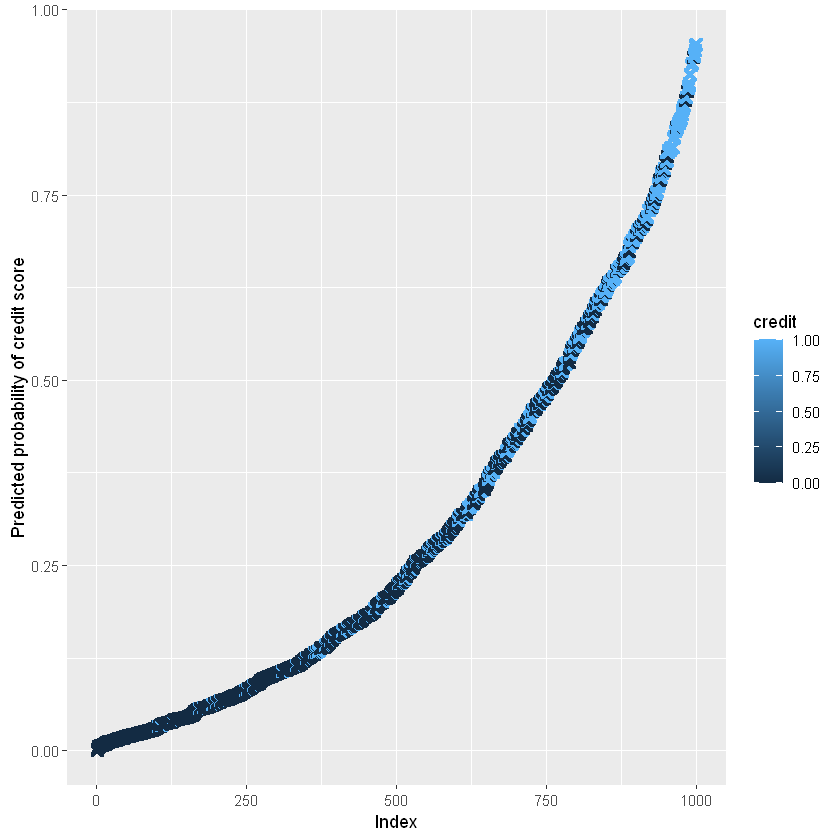

In [55]:
ggplot(data=predicted.data,aes(x=rank,y=probability.of.credit))+geom_point(aes(color=credit),alpha=1,shape=4,stroke=2)+xlab("Index")+ylab("Predicted probability of credit score")

#### Conclusions

We recall that 0 = Good and 1 = Bad.
.
It will cost more for the bank to give loans to individuals with bad credit. To ensure that, I will make the threshold for classification to be less than 0.50.

---